#Automated Classification of Cotton Health: A Deep Learning Approach for Identifying Diseased and Fresh Cotton Leaves and Plants

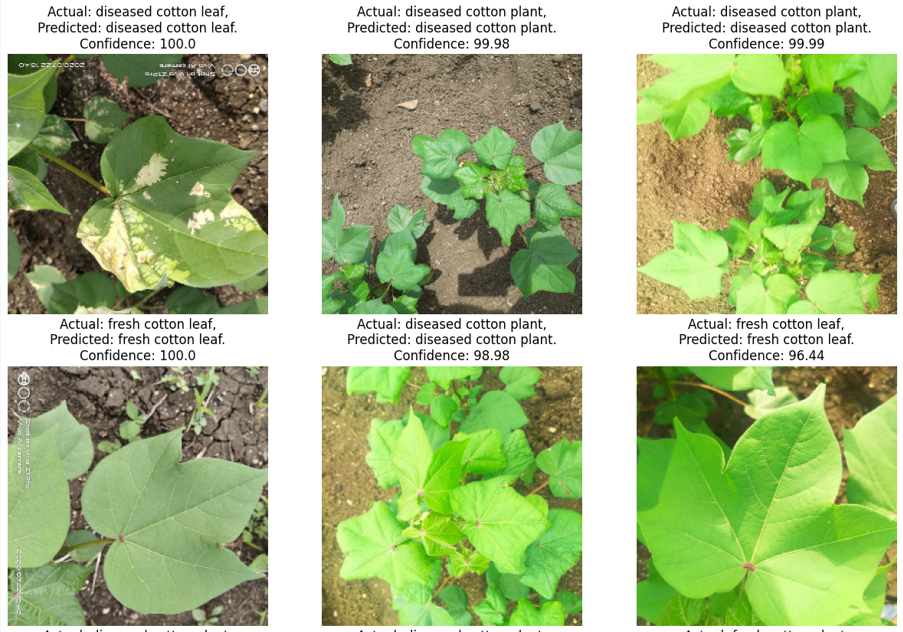

Cotton holds significan economic importance in Bangladesh as a key cash crop, serving as the primary raw material for the textile industry. The annual demand for raw cotton in the country's textile sector is estimated to be approximately 2.5 million bales. However, local production currently meets only a fraction of this demand, standing at around 0.1 million bales. This underscores the substantial reliance on imported cotton to fullfill the needs of Bangladesh's thriving textile industry.

Annually, Bangladesh imports approximately TK 33,000 core worth of cotton from various nations, such as India, Pakistan, Brazil, Australia, Argentina, South African countries and those in Central Asia. According to a Statement from the central Development Bank (CDB), the top official revealed that Bangladesh has realized a cost-saving of $70 million due to the domestic production of 200,000 bales of cotton. This achievement highlights the economic bebefits of local cotton cultivation, contributing to a substantial reduction in import expenses and fostering resilience in the face of international market fluctuations.

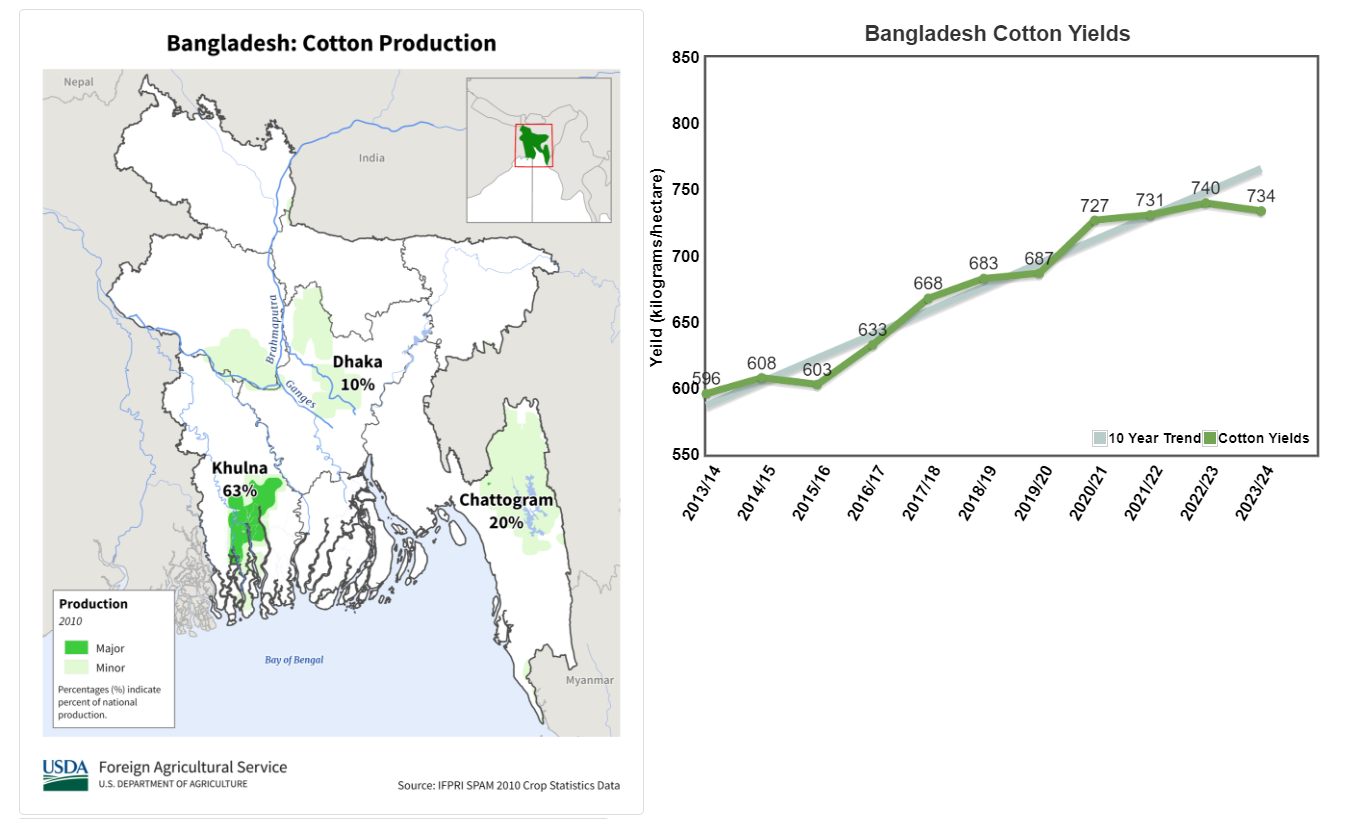

Khulna, Chattogram and Dhaka are the major cotton producing areas. Cotton is mainly sown in the July-August period and harvested in between December and January, it added.

Here, I am attempting to implement a deep learning model for predicting whether an image of a cotton leaf or plant is diseased or not. Upon inputting an image, the model will provide a confidence score and classify whether the image indicates disease presence. This tool is designed to assist farmers in determining the health status of their cotton crops. By leveraging this model, farmers aim to enhance their yields, leading to increased profits and contributions to the overall economy and agrarian sector. The anticipated impact includes a positive influence on the country's Gross Domestic Product (GDP). The implementation of this model is expected to bring economic benefits to farmers and contribute to the growth of the agricultural sector, thereby fostering broader economic development.

===================================================================================================================

In [1]:
#Import The required Python libraries.
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

import os
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from skimage import io, transform
from sklearn.model_selection import learning_curve

===================================================================================================================

In [2]:
#here image size is 256x256
IMAGE_SIZE = 55
#every time process 32 images (61x31)~1951
BATCH_SIZE = 61
#how many color have in these pictures
CHANNELS = 3
#80x25~1951
EPOCHS = 80

===================================================================================================================

'tf.keras.preprocessing.image_dataset_from_directory': This function is
part of the TensorFlow Keras API and is used to create a dataset from a
directory of images.

'shuffle=True': This parameter indicates that the dataset should be
shuffled. Shuffling the dataset is important during training to ensure
that the model doesn't learn patterns based on the order of the images.

'image_size=(IMAGE_SIZE, IMAGE_SIZE)': This parameter specifies the
target size for the images. Images in the dataset will be resized to
the specified dimensions. IMAGE_SIZE is a variable that should be
defined earlier in the code.

'batch_size=BATCH_SIZE': This parameter defines the number of samples
per batch. It is a hyperparameter that determines how many samples are
used in each iteration of training.

In [3]:
# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "J:\\test\\BackGround noise Removed DAta",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 15553 files belonging to 34 classes.


I have categorized my dataset into four classes, with each class associated with its respective folder. Within these folders, there are a total of 1951 image files, signifying distinct representations of each class.

===================================================================================================================

In [4]:
class_names = dataset.class_names
class_names

['Bd30',
 'Bd33',
 'Bd34',
 'Bd49',
 'Bd51',
 'Bd52',
 'Bd56',
 'Bd57',
 'Bd72',
 'Bd75',
 'Bd76',
 'Bd79',
 'Bd85',
 'Bd87',
 'Bd91',
 'Bd93',
 'Bd95',
 'Binadhan07',
 'Binadhan08',
 'Binadhan10',
 'Binadhan11',
 'Binadhan12',
 'Binadhan14',
 'Binadhan16',
 'Binadhan17',
 'Binadhan19',
 'Binadhan20',
 'Binadhan21',
 'Binadhan23',
 'Binadhan24',
 'Binadhan25',
 'Binadhan26',
 'Br22',
 'Br23']

The dataset comprises four classes, namely 'diseased cotton leaf,' 'diseased cotton plant,' 'fresh cotton leaf,' and 'fresh cotton plant.' Each class is specifically represented by its own set of images within the dataset.

===================================================================================================================

In [5]:
# Print the dataset information
print(f"In the dataset, there are {len(dataset)} files belonging to {len(class_names)} classes.")

In the dataset, there are 255 files belonging to 34 classes.


===================================================================================================================

In [6]:
for image_batch,label_batch in dataset.take(1):
  #processing everytime is 61, 256x256 height and weight and every
  #pictures have 3 colors which is rgb
  print(image_batch.shape)

(61, 55, 55, 3)


===================================================================================================================

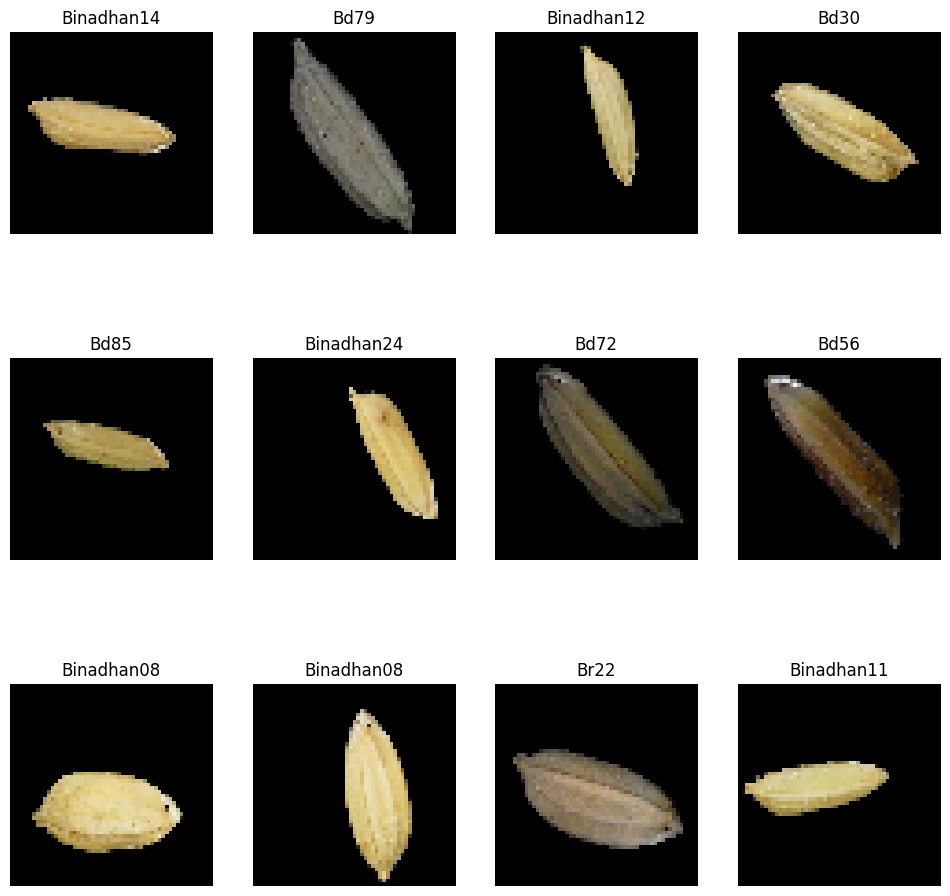

In [9]:
# Display sample images and labels
plt.figure(figsize=(12,12))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

===================================================================================================================

In [10]:
# Split the dataset into train=80%, validation=10%, and test=10% sets
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    #calculate the dataset size
    ds_size = len(ds)
    ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

===================================================================================================================

In [11]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

===================================================================================================================

32x0.8=25.6~25

In [12]:
len(train_ds)

204

===================================================================================================================

32x.1=3.2~3

In [13]:
len(val_ds)

25

===================================================================================================================

32-25-3=4

In [14]:
len(test_ds)

26

===================================================================================================================

.cache(): This function caches the elements of the dataset in memory or on disk. Caching is useful to speed up data loading, especially if the dataset fits into memory.

.shuffle(1000): This shuffles the elements of the dataset. The parameter 1000 specifies the size of the buffer from which elements are randomly chosen for shuffling. A larger buffer size allows for more thorough shuffling.

.prefetch(buffer_size=tf.data.AUTOTUNE): This function prefetches elements from the dataset to improve data loading performance. The buffer_size parameter determines the number of elements to prefetch. Setting it to tf.data.AUTOTUNE allows TensorFlow to dynamically adjust the prefetch buffer size based on available system resources.

In [15]:
# Prepare the data for training
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

===================================================================================================================

In [16]:
# Define the model architecture
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

===================================================================================================================

In [17]:
n_classes

34

===================================================================================================================

#Convolution Neural Network (CNN)

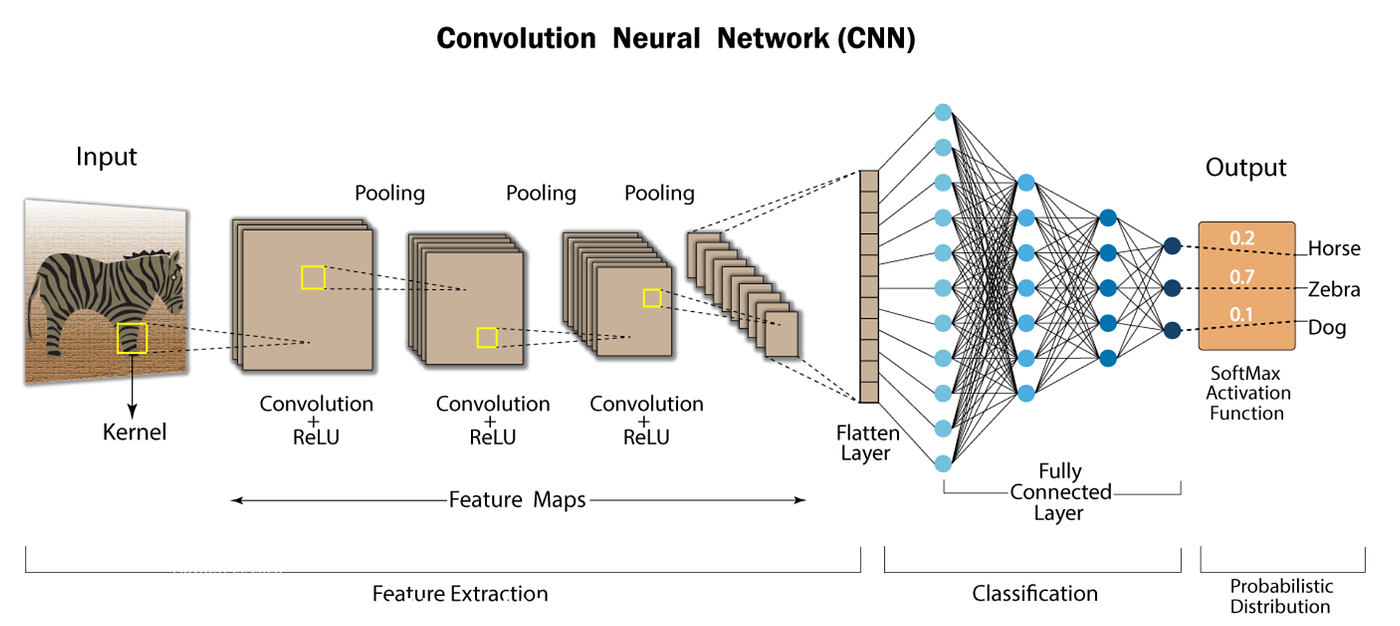

A Convolutional Neural Network (CNN) typically consists of multiple layers that work together to learn hierarchical representations of input data, particularly well-suited for image classification tasks. Here's a simplified explanation of a common CNN architecture:

1. **Input Layer:**
   - The input layer takes in the raw input data, which, in the case of images, is a matrix of pixel values.

2. **Convolutional Layers:**
   - Convolutional layers apply filters (also known as kernels) to the input data, scanning through the image to detect patterns and features. These filters learn to recognize low-level features like edges and textures.

3. **Activation Function:**
   - After each convolutional operation, an activation function (commonly ReLU - Rectified Linear Unit) is applied element-wise to introduce non-linearity and enable the model to learn more complex patterns.

4. **Pooling Layers:**
   - Pooling layers (such as MaxPooling or AveragePooling) follow convolutional layers to reduce the spatial dimensions of the data, preserving the most important information. Pooling helps in reducing computation and makes the learned features more invariant to scale and orientation changes.

5. **Flattening:**
   - After several convolutional and pooling layers, the data is flattened into a vector. This reshaping prepares the data for the fully connected layers.

6. **Fully Connected Layers:**
   - Dense (fully connected) layers are responsible for learning high-level features and making predictions. These layers take the flattened vector as input and gradually reduce it to the final output size (number of classes in classification tasks).

7. **Output Layer:**
   - The output layer produces the final predictions. In a classification task, it often uses a softmax activation function to generate probabilities for each class.

8. **Loss Function:**
   - A loss function measures the difference between the predicted output and the actual target labels. The model learns by minimizing this loss during training.

9. **Optimization Algorithm:**
   - An optimization algorithm (e.g., Stochastic Gradient Descent) adjusts the weights of the neural network based on the calculated loss, gradually improving the model's performance.



===================================================================================================================

In [22]:
model = models.Sequential([
#Resizes input images to the specified dimensions (`IMAGE_SIZE` x `IMAGE_SIZE`).
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
# Normalizes pixel values of input images to the range [0,1].
    layers.experimental.preprocessing.Rescaling(1.0/255),
#Randomly flips input images horizontally and vertically during training for data augmentation.
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
# Randomly applies a rotation to input images during training, with a maximum rotation angle of 0.2 radians.
    layers.experimental.preprocessing.RandomRotation(0.2),
#Convolutional layer with 32 filters, each of size 3x3, using ReLU activation. This is the first layer, and `input_shape` defines the shape of input images.
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
#Max pooling layer with a 2x2 pool size, which reduces the spatial dimensions of the feature maps.
    layers.MaxPooling2D((2, 2)),
# Subsequent blocks of convolutional (`Conv2D`).
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#max pooling (`MaxPooling2D`) layers follow a similar pattern, gradually reducing spatial dimensions while increasing the number of filters.
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64, (3, 3), activation='relu'),
     layers.MaxPooling2D((2, 2)),
#Flattens the 3D output to 1D, preparing it for the fully connected layers.
    layers.Flatten(),
#Fully connected layer with 64 neurons and ReLU activation.
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
##Output layer with `n_classes` neurons (number of classes in your classification task) and softmax activation for multi-class classification.
    layers.Dense(34, activation='softmax'),
])

===================================================================================================================

In [23]:
model.build(input_shape=input_shape)
model.compile(
#'adam': This specifies the optimization algorithm to be used during training.
    optimizer='adam',
#This parameter defines the loss function.
     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#metrics: This parameter is a list of metrics used to evaluate the performance of the model.
    metrics=['accuracy']
)

===================================================================================================================

In [24]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (61, 55, 55, 3)           0         
                                                                 
 rescaling_1 (Rescaling)     (61, 55, 55, 3)           0         
                                                                 
 random_flip_1 (RandomFlip)  (61, 55, 55, 3)           0         
                                                                 
 random_rotation_1 (RandomRo  (61, 55, 55, 3)          0         
 tation)                                                         
                                                                 
 conv2d_2 (Conv2D)           (61, 53, 53, 32)          896       
                                                                 
 max_pooling2d_2 (MaxPooling  (61, 26, 26, 32)         0         
 2D)                                                  

The `model.summary()` method in TensorFlow/Keras is used to display a concise summary of the neural network model. It provides information about the architecture of the model, including details about the layers, output shapes, and the number of parameters.

Here's a breakdown of what each part of the summary typically includes:

1. **Layer (type):** This column shows the type of layer in the neural network, such as Dense, Conv2D, etc.

2. **Output Shape:** Displays the shape of the output produced by each layer. The output shape is specified as `(batch_size, height, width, channels)` for Convolutional layers and `(batch_size, features)` for Dense layers.

3. **Param #:** Represents the number of parameters in each layer. These parameters are the weights and biases that the model learns during training. For example, in a Dense layer, the number of parameters is determined by the size of the input and output dimensions.

4. **Connected to:** Indicates the connections between layers. It shows which layers are connected to the output of a particular layer.

The summary is useful for quickly understanding the overall structure of your model, checking for issues like excessive parameter counts, and ensuring that the model is constructed as expected.

Here's an example of what a typical model summary might look like:

```plaintext
Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
=================================================================
Total params: 970
Trainable params: 970
Non-trainable params: 0
```

In this example, the model consists of two Dense layers, and the summary provides details about the output shape and the number of parameters in each layer. The total trainable parameters are the ones that the model will learn during training.

===================================================================================================================

In [25]:
# Train the model
history = model.fit(
    train_ds,             #Traning dataset
    epochs=EPOCHS,        #Number of training epochs
    batch_size=BATCH_SIZE,#Size of the mini-batches used during training
    verbose=1,            #Verbosity mode. 0=silent, 1=progress bar, 2=one line per epoch
    validation_data=val_ds#Vlidation dataset
)

Epoch 1/80
204/204 [==============================] - 48s 226ms/step - loss: 2.8086 - accuracy: 0.1673 - val_loss: 2.2027 - val_accuracy: 0.2885
Epoch 2/80
204/204 [==============================] - 24s 117ms/step - loss: 1.8808 - accuracy: 0.3865 - val_loss: 1.7542 - val_accuracy: 0.4144
Epoch 3/80
204/204 [==============================] - 24s 119ms/step - loss: 1.6884 - accuracy: 0.4372 - val_loss: 2.0542 - val_accuracy: 0.3469
Epoch 4/80
204/204 [==============================] - 24s 118ms/step - loss: 1.5731 - accuracy: 0.4700 - val_loss: 1.6436 - val_accuracy: 0.4387
Epoch 5/80
204/204 [==============================] - 24s 118ms/step - loss: 1.5074 - accuracy: 0.4904 - val_loss: 1.7990 - val_accuracy: 0.4262
Epoch 6/80
204/204 [==============================] - 25s 125ms/step - loss: 1.4456 - accuracy: 0.5103 - val_loss: 1.7013 - val_accuracy: 0.4289
Epoch 7/80
204/204 [==============================] - 26s 128ms/step - loss: 1.4364 - accuracy: 0.5116 - val_loss: 1.9010 - val_ac

===================================================================================================================

In [26]:
# Evaluate the model
scores = model.evaluate(test_ds)
print("Test Loss: ", scores[0])
print("Test Accuracy: ", scores[1])

26/26 [==============================] - 26s 42ms/step - loss: 1.7146 - accuracy: 0.5618
Test Loss:  1.7145634889602661
Test Accuracy:  0.5617906451225281


===================================================================================================================

In [29]:
#here is these what are calculated by
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

===================================================================================================================

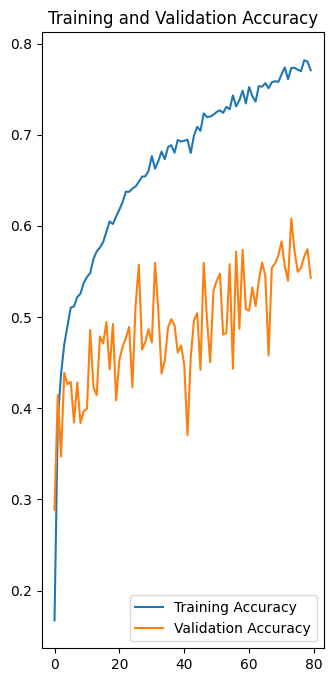

In [31]:
#Plot the training and validation metrics
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(EPOCHS), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

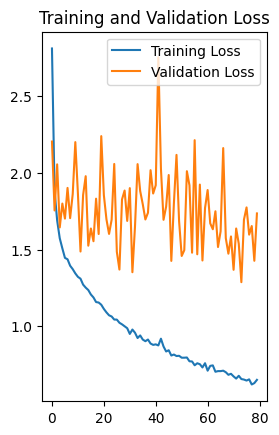

In [32]:
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), history.history['loss'], label='Training Loss')
plt.plot(range(EPOCHS), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Two learning curves are presented: one depicting "Training and Validation Accuracy," and the other illustrating "Training and Validation Loss." While these curves may not exhibit a perfect fit, there is a noteworthy proximity to an ideal alignment. Despite not achieving absolute perfection, the model's classification performance is highly satisfactory, delivering impressive results.

===================================================================================================================

In [33]:
def predict(model, img):
    # Convert the image to a NumPy array
    img_array = tf.keras.preprocessing.image.img_to_array(img)

    # Add an extra dimension to the array to match the model's expected input shape
    img_array = tf.expand_dims(img_array, 0)

    # Use the model to make predictions on the image
    predictions = model.predict(img_array)

    # Find the index of the class with the highest probability
    predicted_class = class_names[np.argmax(predictions[0])]

    # Get the confidence level of the prediction (probability of the predicted class)
    confidence = round(100 * np.max(predictions[0]), 2)

    # Return the predicted class and confidence level
    return predicted_class, confidence


===================================================================================================================

First image to predict
Actual label: Binadhan14
2/2 [==============================] - 0s 22ms/step


predicted Label:  Binadhan19


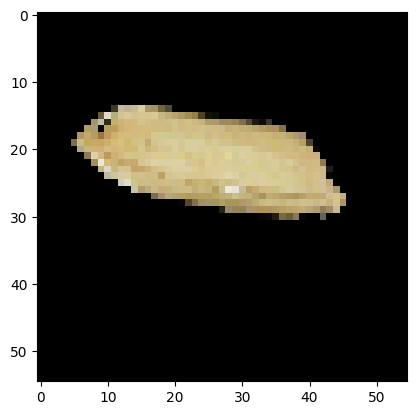

In [34]:

for images_batch, labels_batch in test_ds.take(1):
  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()

  print('First image to predict')
  plt.imshow(first_image)
  print('Actual label:',class_names[first_label])

  batch_prediction=model.predict(images_batch)
  print('predicted Label: ',class_names[np.argmax(batch_prediction[0])])

===================================================================================================================

1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 25ms/step


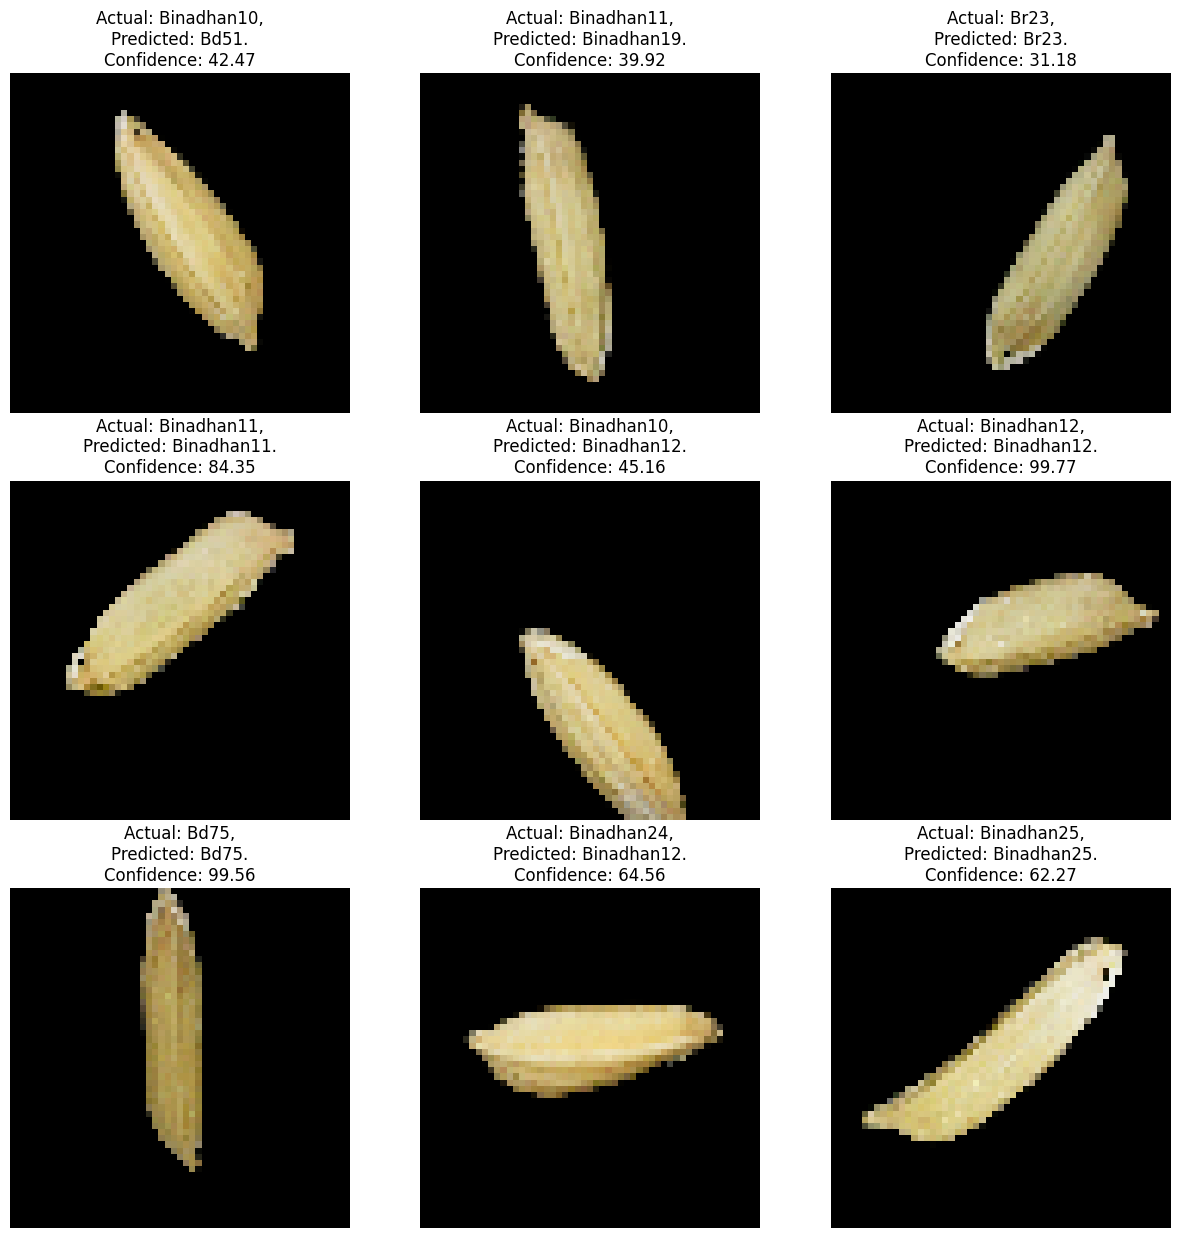

In [35]:

plt.figure(figsize=(15,15))
for images_batch, labels_batch in test_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images_batch[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images_batch[i].numpy())
        actual_class = class_names[labels_batch[i]]

        plt.title(f'Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence}')

        plt.axis('off')

===================================================================================================================